#### Chile Regions GDP Per Capita Figure

In [1]:
import process_chile_gdp_data as pcd

df = pcd.process_data_for_synth()
df.head()

,year,region_name,gdp_cap,population,ed_superior,ed_superior_cap,agropecuario,pesca,mineria,industria_m,electricidad,construccion,comercio,transporte,servicios_financieros,vivienda,personales,publica,id,growth_rate
0,1985,I De Tarapacá,2212588.545,NaN,NaN,NaN,0.009879,0.109209,0.057236,0.153727,0.017591,0.058760,0.090434,0.085300,0.041656,0.067401,0.123343,0.125412,1.0,NaN
1,1986,I De Tarapacá,2273234.037,NaN,NaN,NaN,0.009903,0.127265,0.060959,0.145300,0.017266,0.069915,0.087143,0.088118,0.042979,0.065055,0.119930,0.121847,1.0,NaN
2,1987,I De Tarapacá,2268484.676,NaN,NaN,NaN,0.009903,0.083250,0.047446,0.145348,0.018077,0.095254,0.100225,0.087799,0.047529,0.064671,0.119737,0.120035,1.0,NaN
3,1988,I De Tarapacá,2275506.186,NaN,NaN,NaN,0.010086,0.072526,0.051224,0.151336,0.016154,0.084226,0.102094,0.086618,0.051466,0.064217,0.118528,0.126855,1.0,NaN
4,1989,I De Tarapacá,2446640.978,NaN,NaN,NaN,0.009318,0.088220,0.062924,0.146503,0.015185,0.054298,0.108763,0.096535,0.054859,0.059684,0.109518,0.116224,1.0,NaN


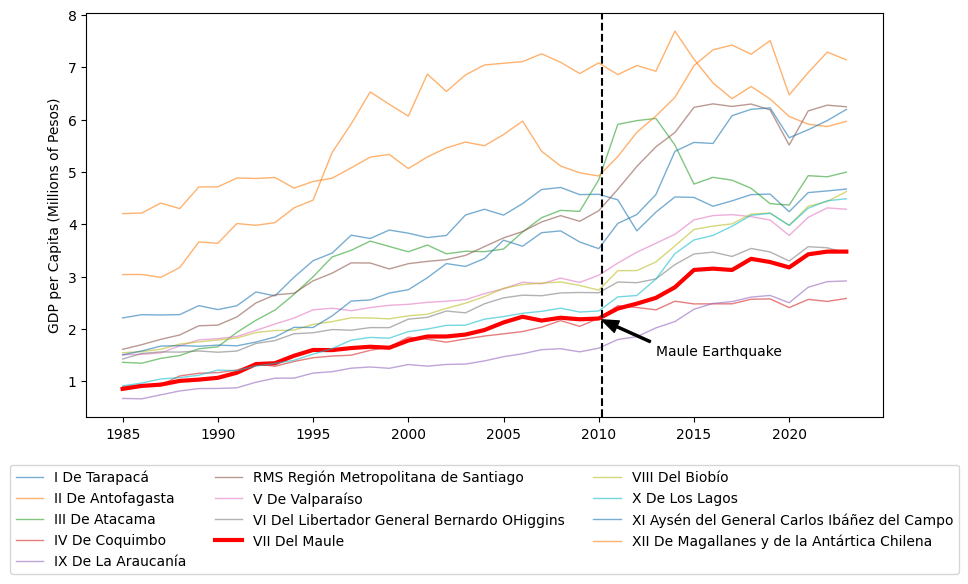

In [45]:
#tools.display_dataframe_to_user(name="Extended GDP per Capita Data", dataframe=merged_df)
import matplotlib.pyplot as plt

gdp_per_capita = df.pivot(index='year', columns='region_name', values='gdp_cap')
# Plot each region's GDP per capita over time with prominence to VII Del Maule and the requested modifications
plt.figure(figsize=(10, 6))
for region in gdp_per_capita.columns:
    if region == 'VII Del Maule':
        plt.plot(gdp_per_capita.index, gdp_per_capita[region]/1000000, label=region, linewidth=3, color='red')
    else:
        plt.plot(gdp_per_capita.index, gdp_per_capita[region]/1000000, label=region, linewidth=1, alpha=0.6)

# Add a vertical line at 2010 with an annotation for the earthquake
plt.axvline(x=2010.17, color='black', linestyle='--')
plt.annotate('Maule Earthquake', xy=(2010, 2.2), xytext=(2013, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=9))


plt.ylabel('GDP per Capita (Millions of Pesos)')
#plt.title('GDP per Capita by Region Over Time')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.show()


#### New Zealand

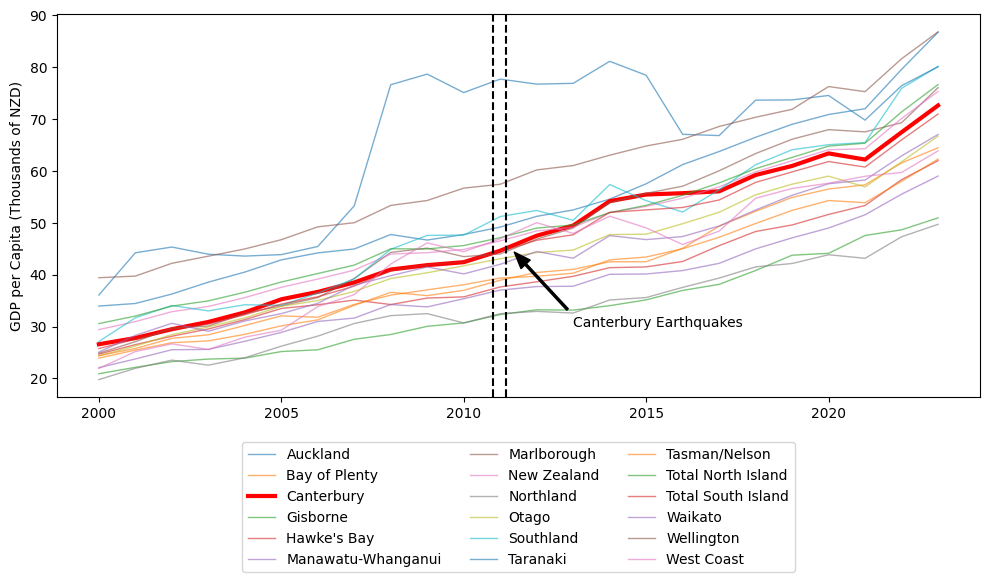

In [46]:

import sys
sys.path.insert(0, '../src')
import nz_util

nz = nz_util.clean_data_for_synthetic_control()
nz.to_csv('../inter/nz.csv', index=False)
# Pivot the data to have years as index and regions as columns for GDP per capita
nz_gdp_per_capita = nz.pivot(index='Year', columns='Region', values='GDP per capita')

# Plot each region's GDP per capita over time with prominence to Canterbury
plt.figure(figsize=(10, 6))
for region in nz_gdp_per_capita.columns:
    if region == 'Canterbury':
        plt.plot(nz_gdp_per_capita.index, nz_gdp_per_capita[region]/1000, label=region, linewidth=3, color='red')
    else:
        plt.plot(nz_gdp_per_capita.index, nz_gdp_per_capita[region]/1000, label=region, linewidth=1, alpha=0.6)

# Add a vertical line at 2010.8 with an annotation for the Canterbury Earthquake
plt.axvline(x=2010.8, color='black', linestyle='--')
plt.axvline(x=2011.17, color='black', linestyle='--')

#plt.text(2010.8, plt.ylim()[1]*0.7, 'Canterbury Earthquake', rotation=90, verticalalignment='center', color='blue')
plt.annotate('Canterbury Earthquakes', xy=(2011.3, 45), xytext=(2013, 30),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=9))

plt.ylabel('GDP per Capita (Thousands of NZD)')
#plt.title('GDP per Capita by Region Over Time in New Zealand')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.show()


### MAP Figure

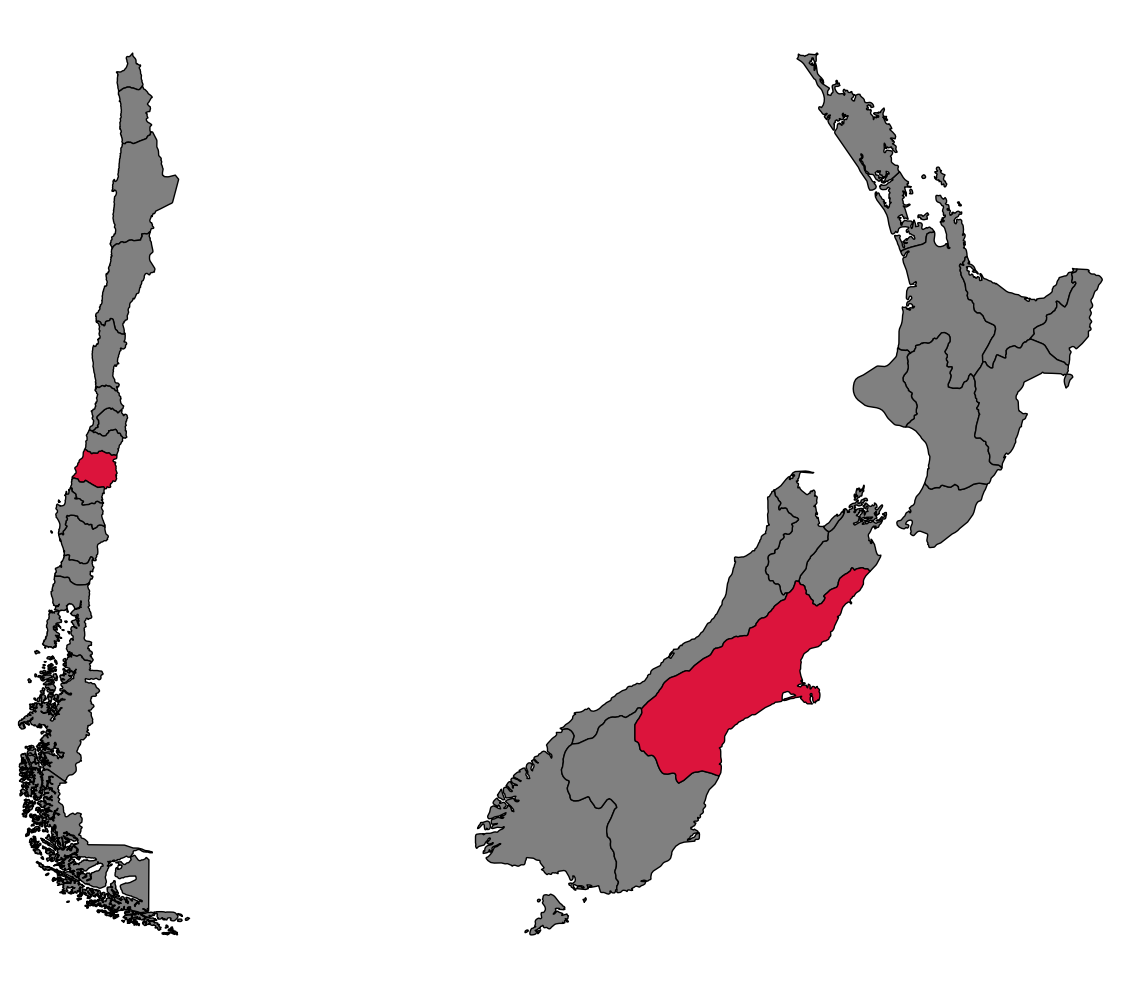

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

chile_shapefile = gpd.read_file('../data/cl_shp/cl.shp')
nz_shapefile = gpd.read_file('../data/nz_shp/nz.shp') 

# Define a function to plot the maps with different colors for regions and highlight the earthquake region
def plot_regions(ax, gdf, earthquake_region, title):
    # Assign a color to each region
    gdf['color'] = 'gray'
    gdf.loc[gdf['name'] == earthquake_region, 'color'] = 'crimson'
    
    # Plot the regions
    gdf.plot(ax=ax, color=gdf['color'], edgecolor='black', legend=True)
    ax.set_axis_off() 
    #ax.set_title(title)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

# Plot Chile with the earthquake region highlighted in red
plot_regions(ax[0], chile_shapefile, earthquake_region='Maule', title='Regions of Chile (Maule highlighted)')

# Plot New Zealand with the earthquake region highlighted in red
plot_regions(ax[1], nz_shapefile, earthquake_region='Canterbury', title='Regions of New Zealand (Canterbury highlighted)')

# Add legends
#handles, labels = ax[0].get_legend_handles_labels()
#ax[0].legend(handles, labels, loc='lower left', title='Regions')

#handles, labels = ax[1].get_legend_handles_labels()
#ax[1].legend(handles, labels, loc='lower left', title='Regions')

plt.tight_layout()
plt.savefig('../inter/regions_map.pdf', format='pdf')
plt.show()
